In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# 1. Генерация данных и правило трех сигм
print("=" * 40)
print("АНАЛИЗ АНОМАЛЬНЫХ НАБЛЮДЕНИЙ")
print("=" * 40)

np.random.seed(42) 
n = 195
x_base = np.random.normal(0, 1, n)

# Добавление заданных значений
x_extended = np.concatenate([x_base, [5, -4, 3.3, 2.99, -3]])

# Сортировка
x_sorted = np.sort(x_extended)
print(f"Размер исходного ряда: {len(x_sorted)}")
print(f"Минимальное значение: {x_sorted[0]:.4f}")
print(f"Максимальное значение: {x_sorted[-1]:.4f}")


АНАЛИЗ АНОМАЛЬНЫХ НАБЛЮДЕНИЙ
Размер исходного ряда: 200
Минимальное значение: -4.0000
Максимальное значение: 5.0000


In [30]:
# Правило трех сигм
mean_val = np.mean(x_sorted)
std_val = np.std(x_sorted)
lower_bound_3sigma = mean_val - 3 * std_val
upper_bound_3sigma = mean_val + 3 * std_val

print(f"\nПРАВИЛО ТРЕХ СИГМ:")
print(f"Среднее: {mean_val:.4f}")
print(f"Стандартное отклонение: {std_val:.4f}")
print(f"Нижняя граница (μ - 3σ): {lower_bound_3sigma:.4f}")
print(f"Верхняя граница (μ + 3σ): {upper_bound_3sigma:.4f}")



ПРАВИЛО ТРЕХ СИГМ:
Среднее: -0.0122
Стандартное отклонение: 1.0963
Нижняя граница (μ - 3σ): -3.3009
Верхняя граница (μ + 3σ): 3.2766


In [31]:
# Проверка первых трех и последних трех порядковых статистик
print(f"\nПРОВЕРКА ПОРЯДКОВЫХ СТАТИСТИК:")
print("-" * 50)

anomalies_3sigma = []

# Проверка минимальных значений
print("Три минимальных значения:")
for i in range(3):
    value = x_sorted[i]
    is_anomaly = value < lower_bound_3sigma
    status = "АНОМАЛИЯ" if is_anomaly else "норма"
    print(f"  {i+1}-е минимальное: {value:.4f} - {status}")
    if is_anomaly:
        anomalies_3sigma.append(value)

# Проверка максимальных значений  
print("\nТри максимальных значения:")
for i in range(1, 4):
    value = x_sorted[-i]
    is_anomaly = value > upper_bound_3sigma
    status = "АНОМАЛИЯ" if is_anomaly else "норма"
    print(f"  {i}-е максимальное: {value:.4f} - {status}")
    if is_anomaly:
        anomalies_3sigma.append(value)

print(f"\nОбнаружено аномалий по правилу 3σ: {len(anomalies_3sigma)}")



ПРОВЕРКА ПОРЯДКОВЫХ СТАТИСТИК:
--------------------------------------------------
Три минимальных значения:
  1-е минимальное: -4.0000 - АНОМАЛИЯ
  2-е минимальное: -3.0000 - норма
  3-е минимальное: -2.6197 - норма

Три максимальных значения:
  1-е максимальное: 5.0000 - АНОМАЛИЯ
  2-е максимальное: 3.3000 - АНОМАЛИЯ
  3-е максимальное: 2.9900 - норма

Обнаружено аномалий по правилу 3σ: 3


In [32]:
# 2. Боксплот Тьюки
print(f"\n" + "="*50)
print("БОКСПЛОТ ТЬЮКИ")
print("="*50)

# Расчет параметров для боксплота Тьюки
q1 = np.percentile(x_sorted, 25)
q3 = np.percentile(x_sorted, 75)
iqr = q3 - q1
lower_bound_tukey = q1 - 1.5 * iqr
upper_bound_tukey = q3 + 1.5 * iqr

print(f"Первый квартиль (Q1): {q1:.4f}")
print(f"Третий квартиль (Q3): {q3:.4f}")
print(f"Межквартильный размах (IQR): {iqr:.4f}")
print(f"Нижняя граница (Q1 - 1.5×IQR): {lower_bound_tukey:.4f}")
print(f"Верхняя граница (Q3 + 1.5×IQR): {upper_bound_tukey:.4f}")



БОКСПЛОТ ТЬЮКИ
Первый квартиль (Q1): -0.7051
Третий квартиль (Q3): 0.5536
Межквартильный размах (IQR): 1.2588
Нижняя граница (Q1 - 1.5×IQR): -2.5933
Верхняя граница (Q3 + 1.5×IQR): 2.4418


In [33]:
# Поиск аномалий по Тьюки
anomalies_tukey = x_sorted[(x_sorted < lower_bound_tukey) | (x_sorted > upper_bound_tukey)]

if len(anomalies_tukey) > 0:
    print("Аномальные значения:")
    for i, val in enumerate(anomalies_tukey):
        print(f"  {i+1}. {val:.4f}")

print(f"\nОбнаружено аномалий по Тьюки: {len(anomalies_tukey)}")

Аномальные значения:
  1. -4.0000
  2. -3.0000
  3. -2.6197
  4. 2.4632
  5. 2.7202
  6. 2.9900
  7. 3.3000
  8. 5.0000

Обнаружено аномалий по Тьюки: 8


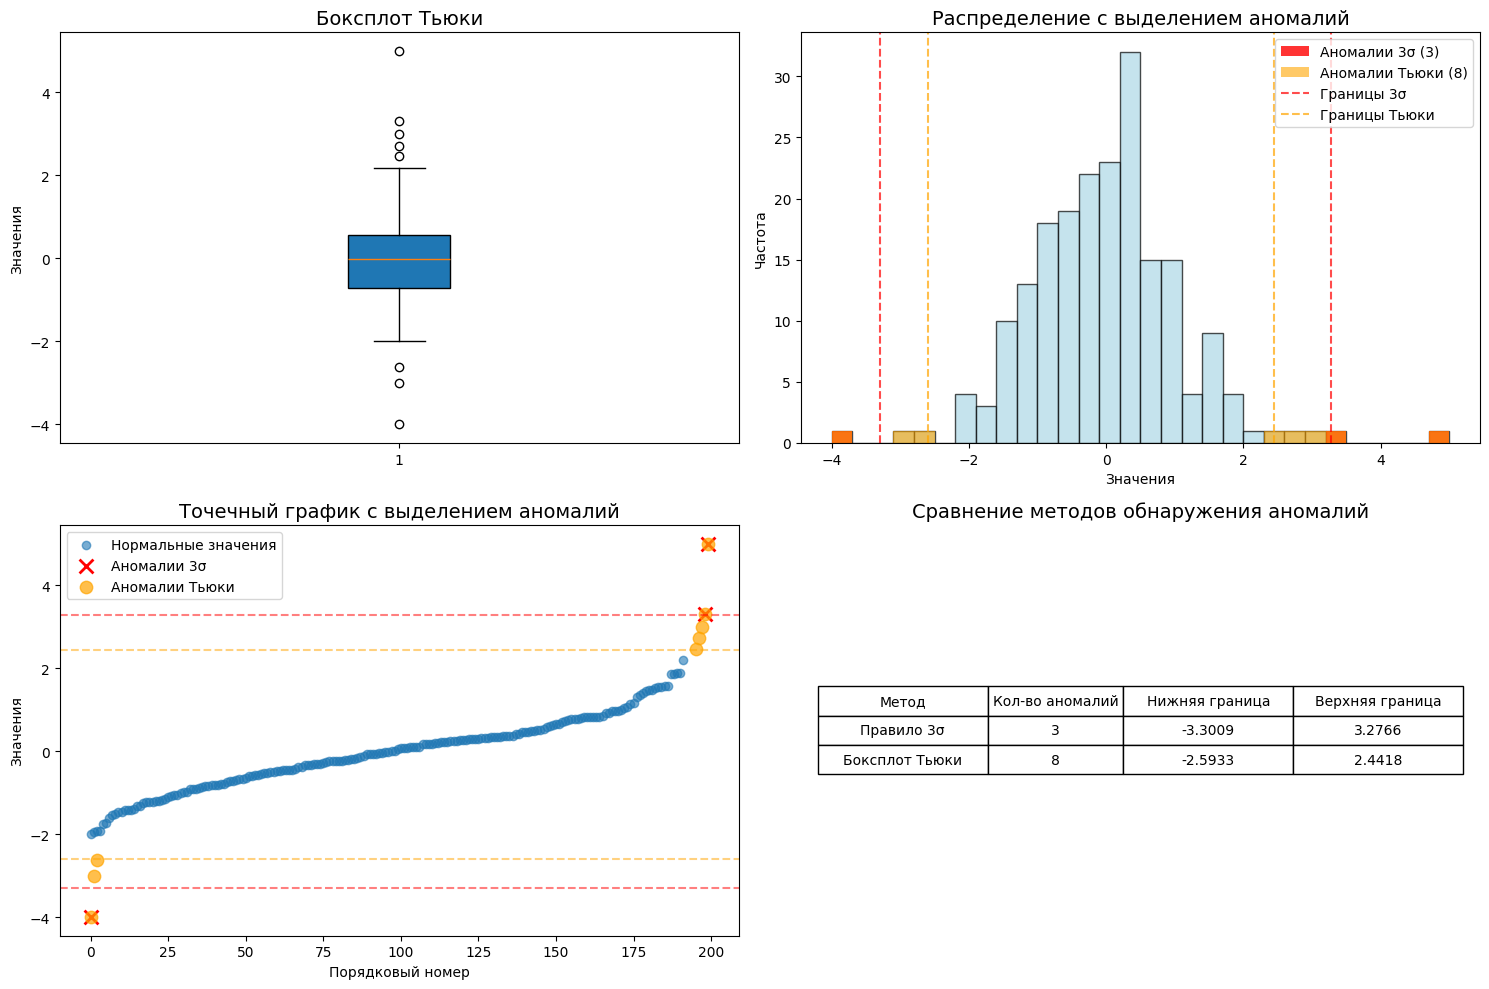

In [34]:
# Визуализация
plt.figure(figsize=(15, 10))

# Боксплот Тьюки
plt.subplot(2, 2, 1)
box_plot = plt.boxplot(x_sorted, vert=True, patch_artist=True)
plt.title('Боксплот Тьюки', fontsize=14)
plt.ylabel('Значения')

# Распределение с выделением аномалий
plt.subplot(2, 2, 2)
n_bins = 30
plt.hist(x_sorted, bins=n_bins, alpha=0.7, color='lightblue', edgecolor='black')

# Выделение аномалий по правилу 3σ
anomalies_3sigma_mask = (x_sorted < lower_bound_3sigma) | (x_sorted > upper_bound_3sigma)
anomalies_3sigma_values = x_sorted[anomalies_3sigma_mask]

# Выделение аномалий по Тьюки
anomalies_tukey_mask = (x_sorted < lower_bound_tukey) | (x_sorted > upper_bound_tukey)
anomalies_tukey_values = x_sorted[anomalies_tukey_mask]

if len(anomalies_3sigma_values) > 0:
    plt.hist(anomalies_3sigma_values, bins=n_bins, alpha=0.8, color='red', 
             label=f'Аномалии 3σ ({len(anomalies_3sigma_values)})')
if len(anomalies_tukey_values) > 0:
    plt.hist(anomalies_tukey_values, bins=n_bins, alpha=0.6, color='orange', 
             label=f'Аномалии Тьюки ({len(anomalies_tukey_values)})')

plt.axvline(lower_bound_3sigma, color='red', linestyle='--', alpha=0.7, label='Границы 3σ')
plt.axvline(upper_bound_3sigma, color='red', linestyle='--', alpha=0.7)
plt.axvline(lower_bound_tukey, color='orange', linestyle='--', alpha=0.7, label='Границы Тьюки')
plt.axvline(upper_bound_tukey, color='orange', linestyle='--', alpha=0.7)

plt.title('Распределение с выделением аномалий', fontsize=14)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()

# Точечный график с аномалиями
plt.subplot(2, 2, 3)
normal_points = x_sorted[~anomalies_3sigma_mask & ~anomalies_tukey_mask]
plt.scatter(range(len(normal_points)), normal_points, alpha=0.6, label='Нормальные значения')

if len(anomalies_3sigma_values) > 0:
    anomaly_indices_3sigma = np.where(anomalies_3sigma_mask)[0]
    plt.scatter(anomaly_indices_3sigma, anomalies_3sigma_values, 
                color='red', marker='x', s=100, label='Аномалии 3σ', linewidth=2)

if len(anomalies_tukey_values) > 0:
    anomaly_indices_tukey = np.where(anomalies_tukey_mask)[0]
    plt.scatter(anomaly_indices_tukey, anomalies_tukey_values, 
                color='orange', marker='o', s=80, label='Аномалии Тьюки', alpha=0.7)

plt.axhline(lower_bound_3sigma, color='red', linestyle='--', alpha=0.5)
plt.axhline(upper_bound_3sigma, color='red', linestyle='--', alpha=0.5)
plt.axhline(lower_bound_tukey, color='orange', linestyle='--', alpha=0.5)
plt.axhline(upper_bound_tukey, color='orange', linestyle='--', alpha=0.5)

plt.title('Точечный график с выделением аномалий', fontsize=14)
plt.xlabel('Порядковый номер')
plt.ylabel('Значения')
plt.legend()

# Сравнительная таблица
plt.subplot(2, 2, 4)
plt.axis('off')

comparison_data = []
methods = ['Правило 3σ', 'Боксплот Тьюки']
anomaly_counts = [len(anomalies_3sigma_values), len(anomalies_tukey_values)]
lower_bounds = [lower_bound_3sigma, lower_bound_tukey]
upper_bounds = [upper_bound_3sigma, upper_bound_tukey]

table_data = []
for i, method in enumerate(methods):
    table_data.append([method, anomaly_counts[i], f"{lower_bounds[i]:.4f}", f"{upper_bounds[i]:.4f}"])

table = plt.table(cellText=table_data,
                  colLabels=['Метод', 'Кол-во аномалий', 'Нижняя граница', 'Верхняя граница'],
                  loc='center',
                  cellLoc='center',
                  colWidths=[0.25, 0.2, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('Сравнение методов обнаружения аномалий', fontsize=14)

plt.tight_layout()
plt.show()


In [35]:
# Детальный анализ добавленных значений
print(f"\n" + "="*50)
print("АНАЛИЗ ДОБАВЛЕННЫХ ЗНАЧЕНИЙ")
print("="*50)

added_values = [5, -4, 3.3, 2.99, -3]
print("Добавленные значения и их статус:")
for val in added_values:
    is_3sigma_anomaly = val < lower_bound_3sigma or val > upper_bound_3sigma
    is_tukey_anomaly = val < lower_bound_tukey or val > upper_bound_tukey
    
    status_3sigma = "АНОМАЛИЯ 3σ" if is_3sigma_anomaly else "норма 3σ"
    status_tukey = "АНОМАЛИЯ Тьюки" if is_tukey_anomaly else "норма Тьюки"
    
    print(f"  {val:6.2f} - {status_3sigma:15} | {status_tukey:15}")

# Выводы
print(f"\n" + "="*50)
print("ВЫВОДЫ")
print("="*50)

print("1. ЧУВСТВИТЕЛЬНОСТЬ МЕТОДОВ:")
print(f"   • Правило 3σ обнаружило: {len(anomalies_3sigma_values)} аномалий")
print(f"   • Боксплот Тьюки обнаружил: {len(anomalies_tukey_values)} аномалий")

print("\n2. РАСХОЖДЕНИЯ В ОБНАРУЖЕНИИ:")
common_anomalies = set(anomalies_3sigma_values).intersection(set(anomalies_tukey_values))
only_3sigma = set(anomalies_3sigma_values) - set(anomalies_tukey_values)
only_tukey = set(anomalies_tukey_values) - set(anomalies_3sigma_values)

print(f"   • Общие аномалии: {len(common_anomalies)}")
print(f"   • Только по правилу 3σ: {len(only_3sigma)}")
print(f"   • Только по Тьюки: {len(only_tukey)}")


АНАЛИЗ ДОБАВЛЕННЫХ ЗНАЧЕНИЙ
Добавленные значения и их статус:
    5.00 - АНОМАЛИЯ 3σ     | АНОМАЛИЯ Тьюки 
   -4.00 - АНОМАЛИЯ 3σ     | АНОМАЛИЯ Тьюки 
    3.30 - АНОМАЛИЯ 3σ     | АНОМАЛИЯ Тьюки 
    2.99 - норма 3σ        | АНОМАЛИЯ Тьюки 
   -3.00 - норма 3σ        | АНОМАЛИЯ Тьюки 

ВЫВОДЫ
1. ЧУВСТВИТЕЛЬНОСТЬ МЕТОДОВ:
   • Правило 3σ обнаружило: 3 аномалий
   • Боксплот Тьюки обнаружил: 8 аномалий

2. РАСХОЖДЕНИЯ В ОБНАРУЖЕНИИ:
   • Общие аномалии: 3
   • Только по правилу 3σ: 0
   • Только по Тьюки: 5
